### MDS hw3
#### 資管四 莊翔安 b08303028

### 1.

(a) 試簡述何謂維度的詛咒？試列舉一案例說明。
> 維度的詛咒在說明當維度增加時，因體積指數增加而使任何演算法需要的資料量將同時指數型上升才能避免因資料稀缺而導致無法獲得良好的結果與統計學上正確且可靠的結果。  
> 在自然語言處理(NLP)的領域中，詞嵌入是將單字轉換成高維度向量的過程，倘若資料本身詞彙量不足以支撐過這樣的維度，就會發生維度的詛咒，神經網路模型很有可能因此無法有效訓練，從而導致結果不佳。

(b) 避免維度詛咒的方法有哪些？
> + 以特徵挑選演算法來選取最佳數量和特徵組合
> + 以特徵提取的方法找到與原始特徵的最佳線性或非線性組合以降維，如 PCA。
> + 更換演算法如 Transfer Learning 可以解決資料稀缺性的問題。

(c) 試找一個開放數據(e.g. Kaggle 開放數據或第一次作業紅酒數據集)並選一種方法(e.g.線性迴歸或決策樹)，用模擬方法固定樣本數但逐步增加變數個數，試著重新繪製圖3.12，呈現維度與預測(或分類)績效間的關係。(提示：模擬方法可思考如下：(1)先做線性迴歸；(2)重要變數依 p-value 排序；(3)將重要的變數一個個依序放入迴歸並計算 adjusted-R2 作為預測準確度)


/Users/hsiangan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/hsiangan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


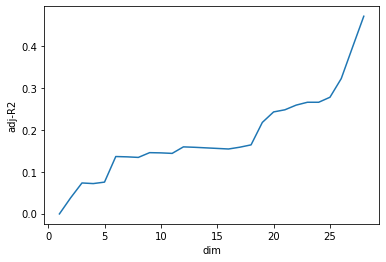

In [32]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt

FEATURES_CNT = 28
df = pd.read_csv("MDS_Assignment1_furnace.csv")
pred = df.grade
D = df[df.columns[:FEATURES_CNT]]
X = sm.add_constant(D)
est = sm.OLS(pred, X)
result = est.fit()
rank_list = [[f'f{i}', value] for i, value in enumerate(result.pvalues[1:])]
rank_list = sorted(rank_list, key=lambda x: x[1], reverse=True)


dims = []
adj_R2 = []
for i in range(FEATURES_CNT):
    features = [f[0] for f in rank_list[:i+1]]
    X = sm.add_constant(df[features])
    est = sm.OLS(pred, X)
    result = est.fit()
    dims.append(len(features))
    adj_R2.append(result.rsquared_adj)

plt.plot(dims, adj_R2)
plt.xlabel("dim")
plt.ylabel("adj-R2")
plt.show()

從圖中我們可發現，當維度增加，也就是不斷增加所選特徵時，adj_R2的數值不斷增加，甚至在選到p-value倒數的最後幾個指標時，此現象更為劇烈。

### 2.

(a) 試找一個開放數據(e.g. Kaggle 開放數據)，您會用什麼方法來確認資料品質的好壞？試操作一次並說明其細節。

In [56]:
df = pd.read_csv('Mobile_Price_Classification.csv')

n,m = df.shape

# step 1: 取得樣本個數和特徵個數
print(f"(樣本個數, 特徵個數): ({n}, {m-1})")

# step 2: 用 OLS 係數檢測數值之間的合理性
pred = df.price_range
D = df[df.columns[:m-1]]
X = sm.add_constant(D)
est = sm.OLS(pred, X)
result = est.fit()

summary = est.fit().summary()

summary


(樣本個數, 特徵個數): (2000, 20)


/Users/hsiangan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1117.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:33:05   Log-Likelihood:                -552.26
No. Observations:                2000   AIC:                             1147.
Df Residuals:                    1979   BIC:                             1264.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5750      0.062    -25.553      0.000      -1.696      -1.454
battery_power     0.0005   1.64e-05     31.071      0.000       0.000       0.001
blue             -0.0020      0.014     -0.141      0.888      -0.030       0.026
clock_speed      -0.0121      0.009     -1.368      0.171      -0.029       0.005
dual_sim         -0.0237      0.014     -1.644      0.100      -0.052       0.005
fc                0.0009      0.002      0.432      0.666      -0.003       0.005
four_g           -0.0015      0.018     -0.083      0.934      -0.036       0.033
int_memory        0.0009      0.000      2.178      0.030    8.61e-05       0.002
m_dep            -0.0100      0.025     -0.399      0.690      -0.059       0.039
mobile_wt        -0.0009      0.000     -4.335      0.000      -0.001      -0.000
n_cores           0.0018      0.003      0.579      0.563      -0.004       0.008
pc                0.0001      0.002      0.083      0.934      -0.003       0.003
px_height         0.0003   1.89e-05     14.626      0.000       0.000       0.000
px_width          0.0003   1.94e-05     14.437      0.000       0.000       0.000
ram               0.0009   6.64e-06    142.688      0.000       0.001       0.001
sc_h              0.0011      0.002      0.575      0.565      -0.003       0.005
sc_w             -0.0003      0.002     -0.171      0.864      -0.004       0.003
talk_time         0.0004      0.001      0.276      0.783      -0.002       0.003
three_g           0.0270      0.021      1.301      0.193      -0.014       0.068
touch_screen     -0.0057      0.014     -0.397      0.691      -0.034       0.022
wifi             -0.0214      0.014     -1.489      0.137      -0.050       0.007
==============================================================================
Omnibus:                      114.748   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.786
Skew:                           0.038   Prob(JB):                     3.10e-10
Kurtosis:                       2.279   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> 觀察每個特徵對應的相關係數，推論是否符合常理。例如，手機重量與價格成負相關、手機的 ram 數、核心數、鏡頭畫素成正比屬於合理。

(b) 公司或您是否有現存方法來進行資料品質的確認？如果有(或沒有)，試依您的角度說明(或建議)確認資料品質的標準作業流程(i.e. SOP)。

> 我認為簡易的資料品質確認方法SOP：
> - 視覺化資料的分佈情況
> - 找出各指標基本的統計數值，如平均數、中位數、標準差、信賴區間等。
> - 透過上述指標，可以找出資料分布是否有不平衡的狀況，若有，視情況補上或刪除資料以達成平衡。
> - 用線性回歸的方法大致看看指標之間的關係是否符合常理。

(C) 試建議三個可能衡量數據品質的量化指標(i.e. KPIs)。
> - 數據分佈情況(distribution)以及平均值、變異數等統計指標
> - 信度與效度
> - 透過線性回歸的參數檢測數據之間的合理性。

### 3.

(a) 在數據科學分析架構中的決策支援階段：什麼是模型的適應性與擴充性？
> 模型的適應性指的是一個特定模型能夠良好的運作在何種背景、領域、資料分佈情況、時間限制內等指標(zero to many)。  
> 模型的擴衝性是指模型在被建構出來後是否可以適用於訓練資料外的外來數據(one to many)。

(b) 在 AI 專案中(可根據第一題的開放數據與模型)，就您所使用的數據與建構的預測模型是否具備適用性與擴充性？為什麼？又該如何調整與改善呢？

> 我認為紅酒數據集不具有擴充性，很大的原因是他的特徵都已經被去資訊化了，也就是僅根據該 .csv 檔無從得知裡面的f1, f2到底是對應到什麼指標。對於新的資料集根本無法使用在這個模型。所以最簡單的調整法就是把特徵真實的定義加上，才能讓模型對於新資料有掌握的能力。(除非是f1, f2在紅酒的領域中擁有特定的意義，如此一來這些特徵才能被辨別)

### 4.

(a) 遺漏值填補的方法包括了統計量填補、預測式填補與生成式填補，試說明這些方法分別適用於什麼樣情形?
> + 做統計量填補時，透過其他特徵找關係，有益於我們選擇想要的資訊。這樣的填補法適合有意控制資訊量的情況。例如在最大值、最小值或者中位數之間做缺漏值填補的選擇，反映了我們對於數據的期望以及信心。
> + 預測式填補法適用於任務不需要太多超參數做調整且沒有太充份的時間可以做機器學習的情況。若已知資料屬於非線性關係，也適合用預測式填補來處理。
> + 生成式填補需要用到機器學習甚至是深度學習的框架，適合用於任務本身十分複雜，擁有許多超參數需要調整的情況。若追求更高的準確度且時間充足，會是使用生成式填補的良好時機。

(b) 為什麼某特徵存在大量遺漏值不宜直接刪除？
> 對於該特徵有值的少量數據可能存在特定的數據分佈或特徵，若直接刪除此項特徵可能間接導致無法觀察到這樣的現象，失去一個有效的衡量指標。

### 5.
在 UCI Machine Learning Repository 開放數據中包含了一個鋼板缺陷數據(steel plates faults dataset，https://archive.ics.uci.edu/ml/datasets/steel+plates+faults)，一共包含了1,941 個觀測值，而每個觀測值具有 27 個特徵以及作為目標值的 7 種缺陷。試挑選出凹凸不平(Bumps)以及刮痕(K_Scratch)兩種缺陷進行分析。試著參考網路資源學習並撰寫程式，使用此數據回答下列問題。

(a) 試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
# Load data from xlsx file
excel_file = pd.ExcelFile('MDS_Assignment2_Steelplates.xlsx')
vars = [var[0] for var in pd.read_excel(excel_file, 'Var_Name',header=None).values.tolist()]
faults = vars[-7:]
df = pd.read_excel(excel_file, 'Faults', names=vars)

# pick out row includes data of both Bumps and K_Scratch to do analysis
rows = df.loc[(df['Bumps'] == 1) | (df['K_Scatch'] == 1)]

# get features-only data and error_type
features = rows.drop(faults,axis=1).to_numpy()
error_type = rows['Bumps'].values

model = sm.Logit(error_type, sm.tools.add_constant(features)).fit()

idx = ['intercept'] + vars[:-7]

results = {"": idx, "estimate":model.params, "std.error":model.bse, "t-value":model.tvalues, "p-value":model.pvalues}

table = pd.DataFrame(results)
print(table.to_string(index=False))

         Current function value: 0.027633
         Iterations: 35
                       estimate  std.error  t-value  p-value
            intercept   -74.898        NaN      NaN      NaN
            X_Minimum    -0.432      0.452   -0.956    0.339
            X_Maximum     0.433      0.451    0.959    0.338
            Y_Minimum    -0.033      0.223   -0.147    0.883
            Y_Maximum     0.033      0.223    0.147    0.883
         Pixels_Areas    -0.033      0.014   -2.395    0.017
          X_Perimeter    -0.140      0.080   -1.758    0.079
          Y_Perimeter     0.168      0.123    1.365    0.172
    Sum_of_Luminosity     0.000      0.000    2.134    0.033
Minimum_of_Luminosity     0.301      0.113    2.660    0.008
Maximum_of_Luminosity     0.494      0.233    2.120    0.034
   Length_of_Conveyer    -0.008      0.012   -0.635    0.525
     TypeOfSteel_A300   -36.599        NaN      NaN      NaN
     TypeOfSteel_A400   -38.295        NaN      NaN      NaN
Steel_Plate_Thickne

/Users/hsiangan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/hsiangan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


> Luminosity_Index 和 bumps 之間的相關性為 -120.050，呈高度負相關性。代表當亮度越高，越有可能是凹凸不平的現象，非常符合人類的預期。

(b) 基於上述(a)的結果，將上述特徵以 t value 進行排序後，哪些特徵的迴歸係數在統計
上是顯著的呢(p-value<0.01)？

In [90]:
vars = table.sort_values(by=['t-value'])
sig_vars = vars[vars['p-value'] < 0.01]
print(sig_vars)

                           estimate  std.error  t-value  p-value
19          Edges_X_Index   -24.280      8.730   -2.781    0.005
26       Luminosity_Index  -120.050     45.640   -2.630    0.009
9   Minimum_of_Luminosity     0.301      0.113    2.660    0.008
15            Edges_Index    11.970      4.034    2.968    0.003


> Edges_X_Index, Luminosity_Index, Minimum_of_Luminosity, Edges_Index 為四個符合顯著定義的特徵。

(c) 試問配適一個羅吉斯迴歸模型是否合適？試若配適不佳，試說明其可能的原因為何?

> 以下將試著用 train test split, 並以 mAE, P/R/F1 和 auc 作為 evalation 的參考指標。

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, precision_recall_fscore_support, roc_auc_score
import pprint
# data splitting
# train: test = 9: 1
x_train, x_test, y_train, y_test = train_test_split(features, error_type,train_size=0.9)

# create model and feed data
model = LogisticRegression(max_iter=1000)
# train model
model.fit(x_train, y_train)

pred = model.predict(x_test)

eval_table = {
    "mAE" : mean_absolute_error(y_test, pred),
    "Percision/Recall/F1Score" : precision_recall_fscore_support(y_test, pred),
    "auc" : roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
}

pprint.pprint(eval_table)

{'Percision/Recall/F1Score': (array([0.95 , 0.975]),
                              array([0.97435897, 0.95121951]),
                              array([0.96202532, 0.96296296]),
                              array([39, 41])),
 'auc': 0.9924953095684803,
 'mAE': 0.0375}


> 從P/R和 F1 score 能輕易看出模型的準確度是足夠好的。另外AUC為0.994，十分接近1，也是個非常好的表現數據。

(d) 試問配適一個線性判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# create model and feed data
model = LinearDiscriminantAnalysis()
# train model
model.fit(x_train, y_train)

pred = model.predict(x_test)

eval_table = {
    "mAE" : mean_absolute_error(y_test, pred),
    "Percision/Recall/F1Score" : precision_recall_fscore_support(y_test, pred),
    "auc" : roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
}

pprint.pprint(eval_table)

{'Percision/Recall/F1Score': (array([1.        , 0.95454545]),
                              array([0.94736842, 1.        ]),
                              array([0.97297297, 0.97674419]),
                              array([38, 42])),
 'auc': 0.9981203007518797,
 'mAE': 0.025}


> 從 P/R F1 score 來看，線性判別分析模型和羅吉斯模型的表現十分相近，線性判別分析模型的 auc 更提高了一些，mAE 也下降到 0.025。

(e) 試問配適一個二次判別分析模型是否合適？若配適不佳，試說明其可能的原因為
何？

In [98]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# create model and feed data
model = QuadraticDiscriminantAnalysis()
# train model
model.fit(x_train, y_train)

pred = model.predict(x_test)

eval_table = {
    "mAE" : mean_absolute_error(y_test, pred),
    "Percision/Recall/F1Score" : precision_recall_fscore_support(y_test, pred),
    "auc" : roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
}

pprint.pprint(eval_table)

{'Percision/Recall/F1Score': (array([1.        , 0.91304348]),
                              array([0.89473684, 1.        ]),
                              array([0.94444444, 0.95454545]),
                              array([38, 42])),
 'auc': 0.9993734335839599,
 'mAE': 0.05}


/Users/hsiangan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


>同樣從 P/R 和 F1 score ，以及 auc 的數據表現來看，二次判別分析的準確度都還不錯，但相比羅吉斯與線性判別模型各指標標都差了一些，尤其是mAE，來到0.5。不過對於這個任務，二次判別模型依舊是適和的選擇。